In [1]:
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pylab as plt
from struct import *

from IPython.display import Video

In [10]:
import vdms
import util

db = vdms.vdms()
db.connect("localhost")

# Addvideo

In [11]:
# AddVideo - Source and target encoding are exact,
# this routine will be very fast as VDMS server avoids decode and encode

blobs = []
fd = open("/hosthome/media/Megamind.mp4", 'rb') 
blobs.append(fd.read())
fd.close()

# Simplest addvideo with keyframe graph extraction
query = [ {   
    "AddVideo": {
        "properties":{ 
            "name": "megamind_clip"
        }, 
        "codec": "h264",
        "container": "mp4"
    }   
}
]

resp, res_blob = db.query(query, [blobs])
print(resp)

[{'AddVideo': {'info': '', 'status': 0}}]


In [12]:
# AddVideo - Source and target encoding are exact,
# similar to functionality above, just another videos

blobs = []
fd = open("/hosthome/media/f65sec.mp4", 'rb') 
blobs.append(fd.read())
fd.close()

# Simplest addvideo with keyframe graph extraction
query = [ {   
    "AddVideo": {
        "properties":{ 
            "name": "f65sec"
        }, 
        "codec": "h264",
        "container": "mp4"
    }   
}
]

resp, res_blob = db.query(query, [blobs])
print(resp)

[{'AddVideo': {'info': '', 'status': 0}}]


In [13]:
# AddVideo - different source and target encoding
# transcoding will happen at VDMS server
# Megamind.avi contains h263 stream

blobs = []
fd = open("/hosthome/media/Megamind.avi", 'rb') 
blobs.append(fd.read())
fd.close()

# Simplest addvideo with keyframe graph extraction
query = [ {   
    "AddVideo": {
        "properties":{ 
            "name": "transcoded_megamind_clip"
        }, 
        "codec": "h264",
        "container": "mp4"
    }   
}
]

resp, res_blob = db.query(query, [blobs])
print(resp)

[{'AddVideo': {'info': '', 'status': 0}}]


In [14]:
# AddVideo - without labeling name
# if name is not provided, the internal label will match file path in the server

blobs = []
fd = open("/hosthome/media/store-aisle-detection.mp4", 'rb') 
blobs.append(fd.read())
fd.close()

# Simplest addvideo with keyframe graph extraction
query = [ {   
    "AddVideo": {
        "codec": "h264",
        "container": "mp4"
    }   
}
]

resp, res_blob = db.query(query, [blobs])
print(resp)

[{'AddVideo': {'info': '', 'status': 0}}]


# FindVideo

In [17]:
qry = \
[
    {
        "FindVideo":
        {
            "constraints":
            {
                "name": ["==", "megamind_clip"]
            },
            "results":
            {
                "list": ["name", "VD:VIDNAME"]
            }
        }
    }
]

response, blob = db.query(qry)

print(response)
print("MP4 Size:", len(blob[0])/1024, "KB")

vidname='/hosthome/findvideo_megamind.mp4'
with open(vidname, 'wb+') as fd:
    fd.write(blob[0])

[{'FindVideo': {'entities': [{'name': 'megamind_clip', 'VD:VIDNAME': 'megamind_clip'}], 'returned': 1, 'status': 0}}]
MP4 Size: 752.1298828125 KB


In [19]:
qry = \
[
    {
        "FindVideo":
        {
            "results":
            {
                "list": ["name", "VD:VIDNAME"]
            }
        }
    }
]

response, blob = db.query(qry)

print(response)

print("\nNo. of videos:", len(blob))
for i, (blb, namedict) in enumerate(zip(blob, response[0]['FindVideo']['entities'])):
    
    vidname='/hosthome/findvideo_' + namedict['name'].replace(" ","_") + ".mp4"
    
    with open(vidname, 'wb+') as fd:
        fd.write(blb)
        print("\nWritten -", vidname)
        
    print("MP4 Size:", len(blb)/1024, "KB")

[{'FindVideo': {'entities': [{'name': 'Missing property', 'VD:VIDNAME': 'db/videos/204ba214e810ee54.mp4'}, {'name': 'transcoded_megamind_clip', 'VD:VIDNAME': 'transcoded_megamind_clip'}, {'name': 'f65sec', 'VD:VIDNAME': 'f65sec'}, {'name': 'megamind_clip', 'VD:VIDNAME': 'megamind_clip'}], 'returned': 4, 'status': 0}}]

No. of videos: 4

Written - /hosthome/findvideo_Missing_property.mp4
MP4 Size: 8998.6064453125 KB

Written - /hosthome/findvideo_transcoded_megamind_clip.mp4
MP4 Size: 727.078125 KB

Written - /hosthome/findvideo_f65sec.mp4
MP4 Size: 6750.84375 KB

Written - /hosthome/findvideo_megamind_clip.mp4
MP4 Size: 752.1298828125 KB


In [18]:
qry = \
[
    {
        "FindVideo":
        {
            "results":
            {
                "list": ["name", "VD:VIDNAME"]
            },
            "operations": [
                {
                    "type" : "interval",
                    "start": 100,
                    "stop" : 250,
                    "step" : 5
                }
            ]
        }
    }
]

response, blob = db.query(qry)

print(response)

print("\nNo. of videos:", len(blob))
for i, (blb, namedict) in enumerate(zip(blob, response[0]['FindVideo']['entities'])):
    
    vidname='/hosthome/findvideo_interval_' + namedict['name'].replace(" ","_") + ".mp4"
    
    with open(vidname, 'wb+') as fd:
        fd.write(blb)
        print("\nWritten -", vidname)
        
    print("MP4 Size:", len(blb)/1024, "KB")

[{'FindVideo': {'entities': [{'name': 'Missing property', 'VD:VIDNAME': 'db/videos/204ba214e810ee54.mp4'}, {'name': 'transcoded_megamind_clip', 'VD:VIDNAME': 'transcoded_megamind_clip'}, {'name': 'f65sec', 'VD:VIDNAME': 'f65sec'}, {'name': 'megamind_clip', 'VD:VIDNAME': 'megamind_clip'}], 'returned': 4, 'status': 0}}]

No. of videos: 4

Written - /hosthome/findvideo_interval_Missing_property.mp4
MP4 Size: 57.6044921875 KB

Written - /hosthome/findvideo_interval_transcoded_megamind_clip.mp4
MP4 Size: 149.0458984375 KB

Written - /hosthome/findvideo_interval_f65sec.mp4
MP4 Size: 251.66015625 KB

Written - /hosthome/findvideo_interval_megamind_clip.mp4
MP4 Size: 145.9150390625 KB


# FindFrames

[{'FindFrames': {'returned': 1, 'status': 0}}]
First Frame Size: 53.1796875 KB


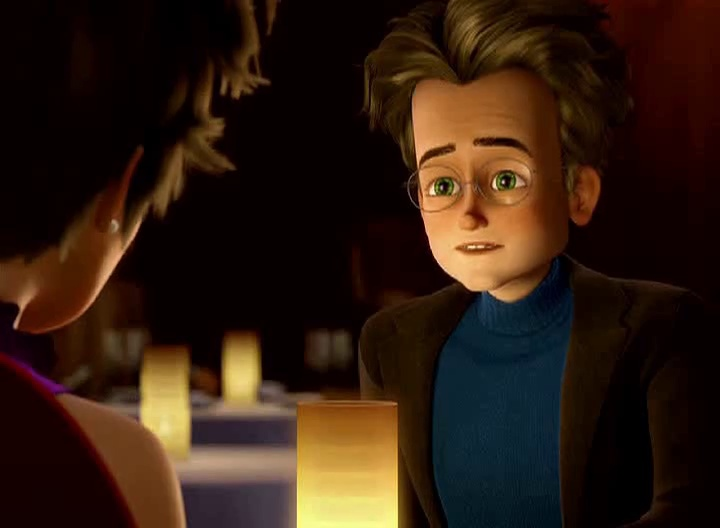

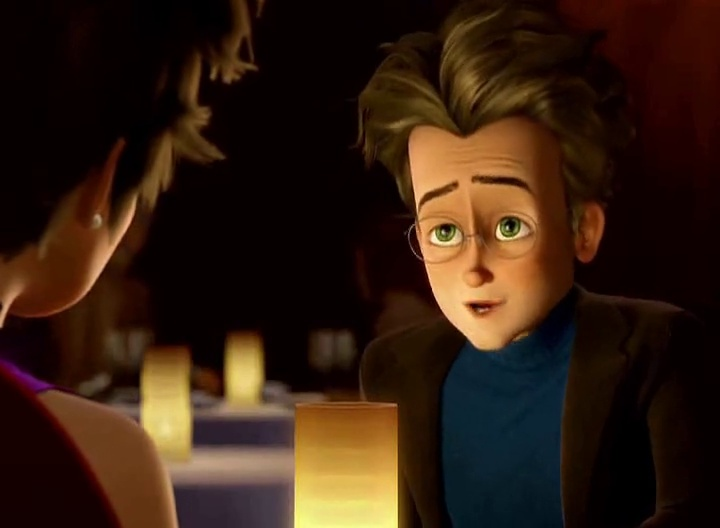

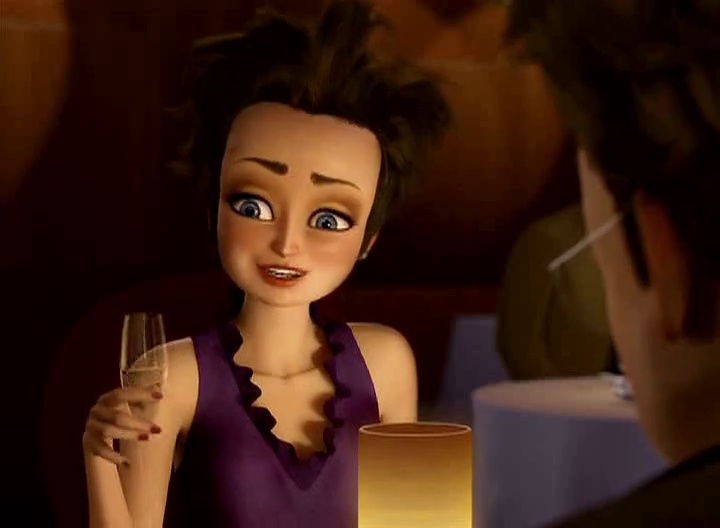

Number of images: 3


In [21]:
# FindFrames - with indices of interested frame - in jpg

qry = [ {
    "FindFrames": {
        "frames": [100, 130, 160],
        "constraints": {
            "name": ["==", "megamind_clip"]
        }, 
        "format": "jpg"
    }
}
]

response, blob = db.query(qry)

print(response)
print("First Frame Size:", len(blob[0])/1024, "KB")

util.display_images(blob)    
print ("Number of images:", len(blob))

[{'FindFrames': {'returned': 1, 'status': 0}}]
First Frame Size: 817.5068359375 KB


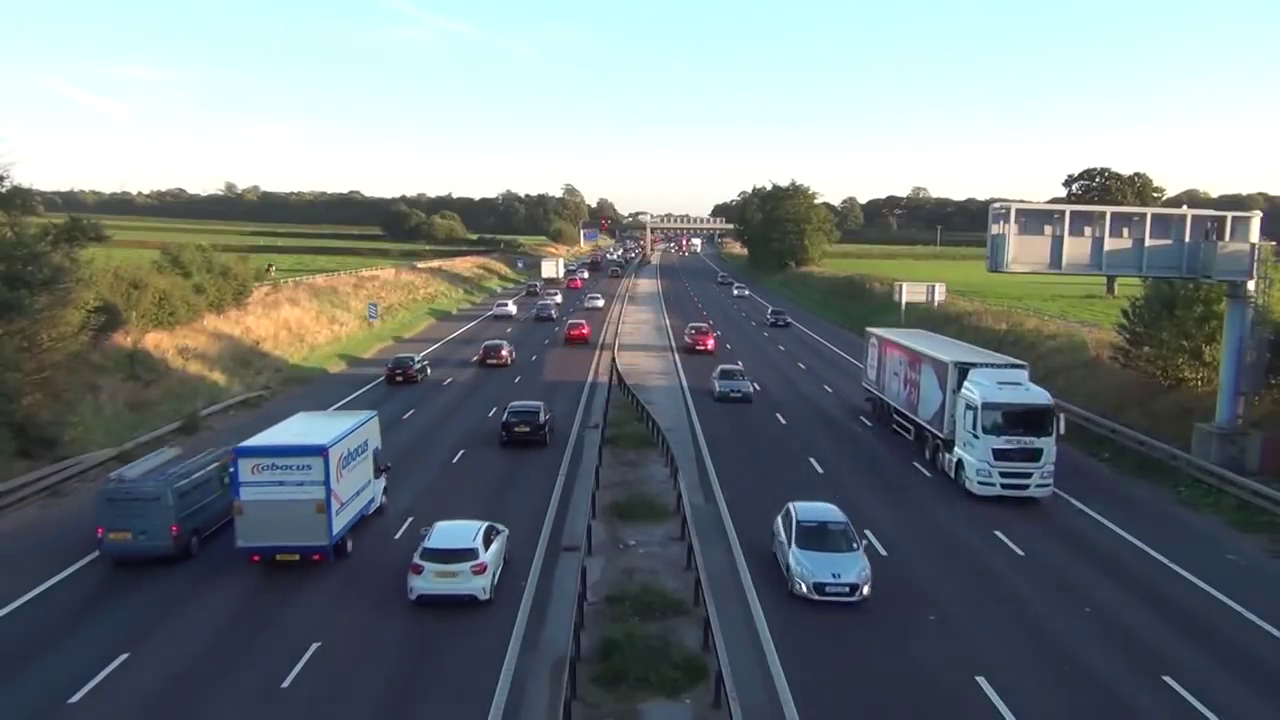

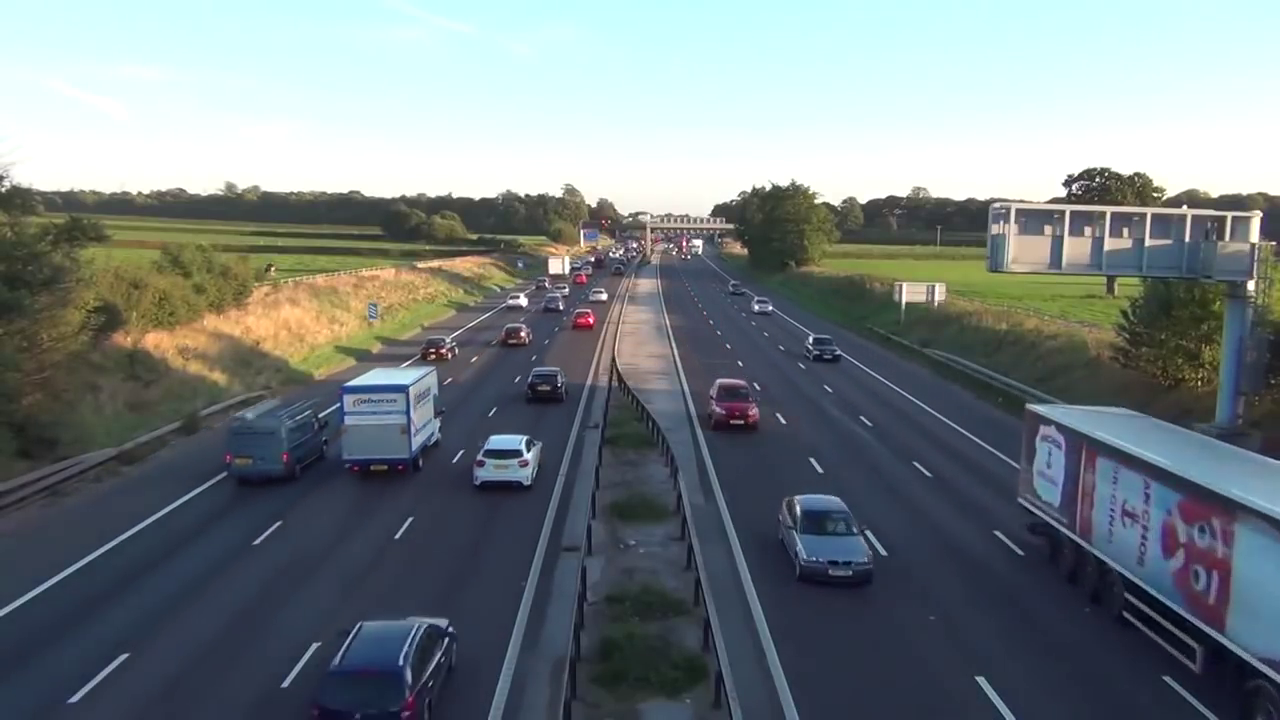

Number of images: 2


In [24]:
# FindFrames - with indices of interested frame - in png

qry = [ {
    "FindFrames": {
        "frames": [55, 76],
        "constraints": {
            "name": ["==", "f65sec"]
        }, 
        "format": "png"
    }
}
]

response, blob = db.query(qry)

print(response)
print("First Frame Size:", len(blob[0])/1024, "KB")

util.display_images(blob)    
print ("Number of images:", len(blob))

[{'FindFrames': {'returned': 1, 'status': 0}}]
First Frame Size: 1113.76171875 KB


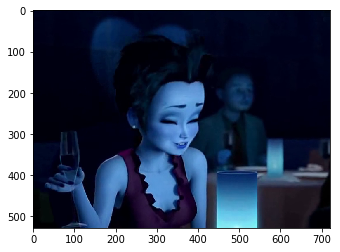

In [25]:
# FindFrames - with indices of interested frame - in cvmat (OpenCV Mat)
# blob structure for cvmat is opencv mat appended with height, width and channel
qry = [ {
    "FindFrames": {
        "frames": [55, 76],
        "constraints": {
            "name": ["==", "megamind_clip"]
        }, 
        "format": "mat"
    }
}
]

response, blob = db.query(qry)
print(response)
print("First Frame Size:", len(blob[0])/1024, "KB")


for i, blb in enumerate(blob):
    height = unpack('I', blb[-12:-8])[0]
    width = unpack('I', blb[-8:-4])[0]
    channel = unpack('I', blb[-4:])[0]
    
    mat = np.array(list(iter_unpack('B', blb[:-12]))).reshape(height, width, channel)
    plt.imshow(mat)

In [26]:
# FindFrames - with interval - return in mp4

qry = [ {
    "FindFrames": {
        "constraints": {
            "name": ["==", "f65sec"]
        }, 
        "operations": [
            {
                "type": "interval",
                "start": 100,
                "stop": 250,
                "step": 5
            }
        ],
        "format": "mp4"
    }
}
]

response, blob = db.query(qry)

print(response)
print("MP4 Size:", len(blob[0])/1024, "KB")

vidname='/hosthome/findframes_interval.mp4'
with open(vidname, 'wb+') as fd:
    fd.write(blob[0])

[{'FindFrames': {'returned': 1, 'status': 0}}]
MP4 Size: 251.66015625 KB


In [27]:
qry = [ {
    "FindFrames": {
        "frames": [1,3,5,6,7,10,11,15,16,17,20,21,22,24, 100, 102, 110, 113, 115, 117, 119,150, 155, 166 ],
        "constraints": {
            "name": ["==", "megamind_clip"]
        }, 
        "format": "mp4"
    }
}
]

response, blob = db.query(qry)

print(response)
print("MP4 Size:", len(blob[0])/1024, "KB")

vidname='/hosthome/findframes_indices.mp4'
with open(vidname, 'wb+') as fd:
    fd.write(blob[0])

[{'FindFrames': {'returned': 1, 'status': 0}}]
MP4 Size: 103.498046875 KB


# Supplemental query

In [28]:
qry = [
        {
            "FindVideo": 
            {
                "_ref": 3,
                "results" : 
                {
                    "list" : ["name"]
                }
            }
        },
        {
            "FindEntity" : 
            {
                "link": 
                {
                    "ref": 3
                },
                "class" : "VD:KF",
                "results" : 
                {
                    "list" : ['VD:VIDNAME','VD:frameIdx',"VD:pktPos","VD:pktTS"]
                }
            }
        }
]

response, blob = db.query(qry)

print(response[0], "\n")

for entity in response[1]['FindEntity']['entities']:
    print(entity)

{'FindVideo': {'entities': [{'name': 'Missing property'}, {'name': 'transcoded_megamind_clip'}, {'name': 'f65sec'}, {'name': 'megamind_clip'}], 'returned': 4, 'status': 0}} 

{'VD:pktTS': 3897894, 'VD:pktPos': 9127979, 'VD:frameIdx': 3894, 'VD:VIDNAME': 'db/videos/204ba214e810ee54.mp4'}
{'VD:pktTS': 3838835, 'VD:pktPos': 8968242, 'VD:frameIdx': 3835, 'VD:VIDNAME': 'db/videos/204ba214e810ee54.mp4'}
{'VD:pktTS': 3779776, 'VD:pktPos': 8819211, 'VD:frameIdx': 3776, 'VD:VIDNAME': 'db/videos/204ba214e810ee54.mp4'}
{'VD:pktTS': 3720717, 'VD:pktPos': 8677882, 'VD:frameIdx': 3717, 'VD:VIDNAME': 'db/videos/204ba214e810ee54.mp4'}
{'VD:pktTS': 3661658, 'VD:pktPos': 8541383, 'VD:frameIdx': 3658, 'VD:VIDNAME': 'db/videos/204ba214e810ee54.mp4'}
{'VD:pktTS': 3602599, 'VD:pktPos': 8394488, 'VD:frameIdx': 3599, 'VD:VIDNAME': 'db/videos/204ba214e810ee54.mp4'}
{'VD:pktTS': 3543540, 'VD:pktPos': 8252039, 'VD:frameIdx': 3540, 'VD:VIDNAME': 'db/videos/204ba214e810ee54.mp4'}
{'VD:pktTS': 3484481, 'VD:pktPos':

In [29]:
qry = [
        {
            "FindVideo": 
            {
                "_ref": 3,
                "results" : 
                {
                    "list" : ["name"]
                }
            }
        },
        {
            "FindEntity" : 
            {
                "link": 
                {
                    "ref": 3
                },
                "class" : "VD:KF",
                "results" : 
                {
                    "list" : ['VD:VIDNAME','VD:frameIdx',"VD:pktPos","VD:pktTS"]
                }
            }
        }
]

response, blob = db.query(qry)

print(response[0], "\n")

for entity in response[1]['FindEntity']['entities']:
    print(entity)

{'FindVideo': {'entities': [{'name': 'Missing property'}, {'name': 'transcoded_megamind_clip'}, {'name': 'f65sec'}, {'name': 'megamind_clip'}], 'returned': 4, 'status': 0}} 

{'VD:pktTS': 3897894, 'VD:pktPos': 9127979, 'VD:frameIdx': 3894, 'VD:VIDNAME': 'db/videos/204ba214e810ee54.mp4'}
{'VD:pktTS': 3838835, 'VD:pktPos': 8968242, 'VD:frameIdx': 3835, 'VD:VIDNAME': 'db/videos/204ba214e810ee54.mp4'}
{'VD:pktTS': 3779776, 'VD:pktPos': 8819211, 'VD:frameIdx': 3776, 'VD:VIDNAME': 'db/videos/204ba214e810ee54.mp4'}
{'VD:pktTS': 3720717, 'VD:pktPos': 8677882, 'VD:frameIdx': 3717, 'VD:VIDNAME': 'db/videos/204ba214e810ee54.mp4'}
{'VD:pktTS': 3661658, 'VD:pktPos': 8541383, 'VD:frameIdx': 3658, 'VD:VIDNAME': 'db/videos/204ba214e810ee54.mp4'}
{'VD:pktTS': 3602599, 'VD:pktPos': 8394488, 'VD:frameIdx': 3599, 'VD:VIDNAME': 'db/videos/204ba214e810ee54.mp4'}
{'VD:pktTS': 3543540, 'VD:pktPos': 8252039, 'VD:frameIdx': 3540, 'VD:VIDNAME': 'db/videos/204ba214e810ee54.mp4'}
{'VD:pktTS': 3484481, 'VD:pktPos':

# Complex query

[{'FindFrames': {'returned': 4, 'status': 0}}]
First Frame Size: 137.2509765625 KB


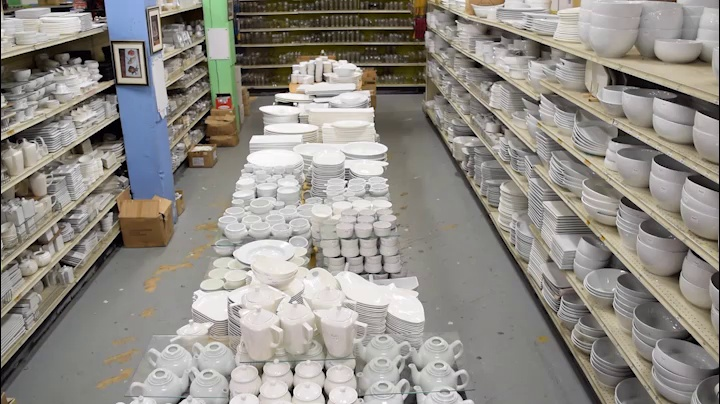

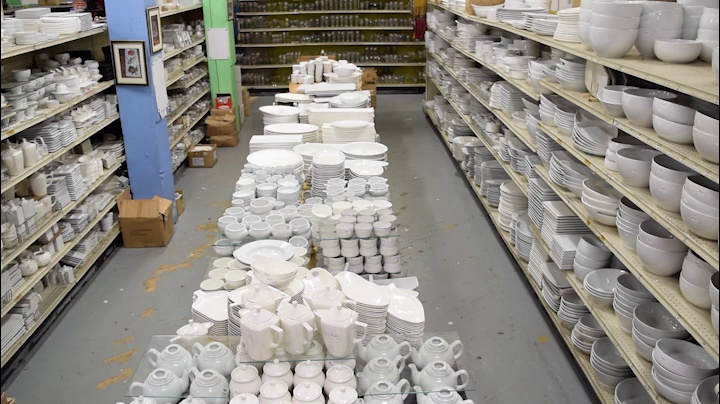

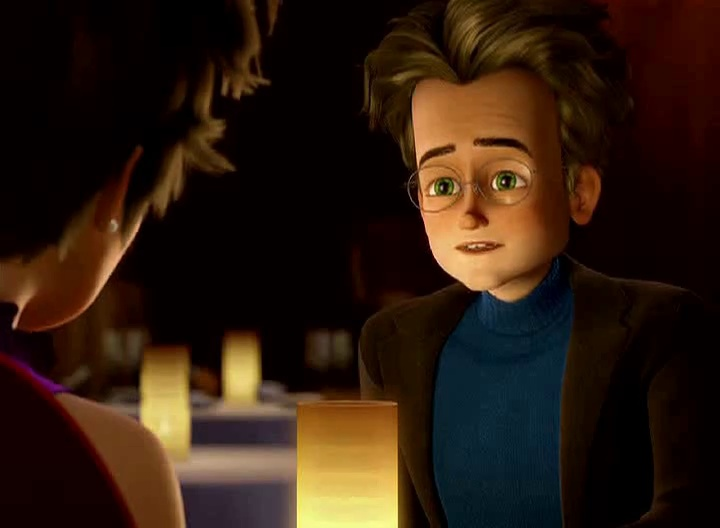

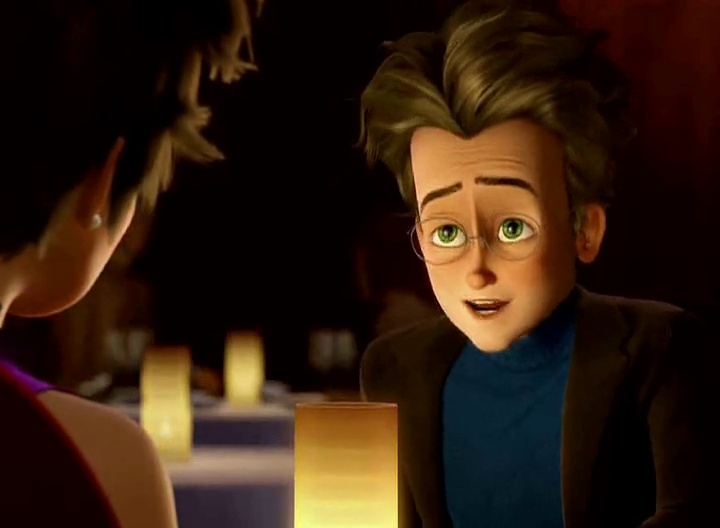

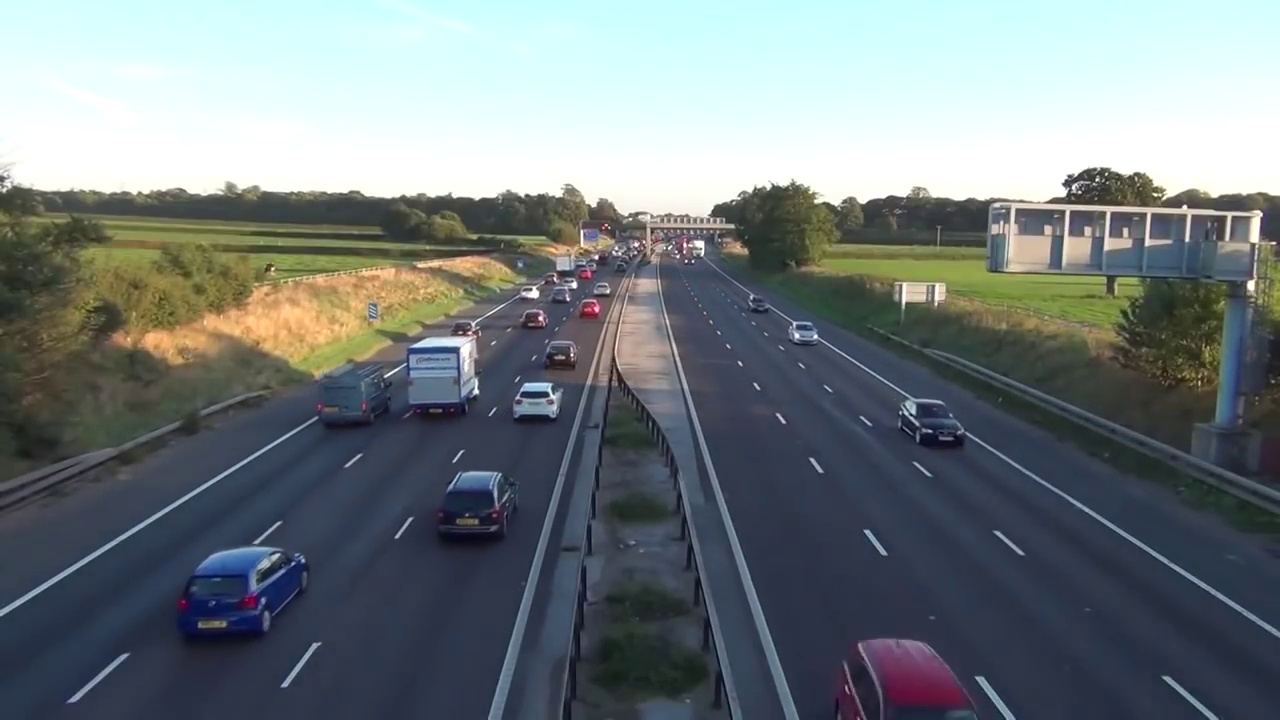

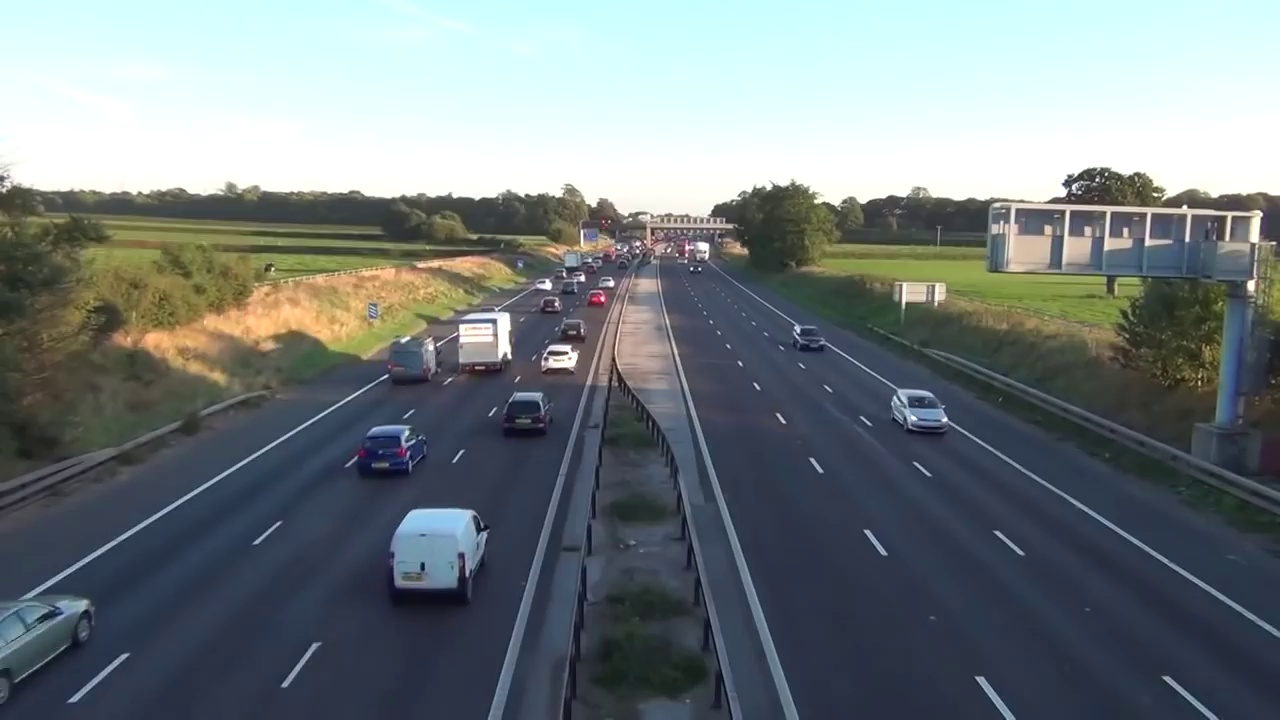

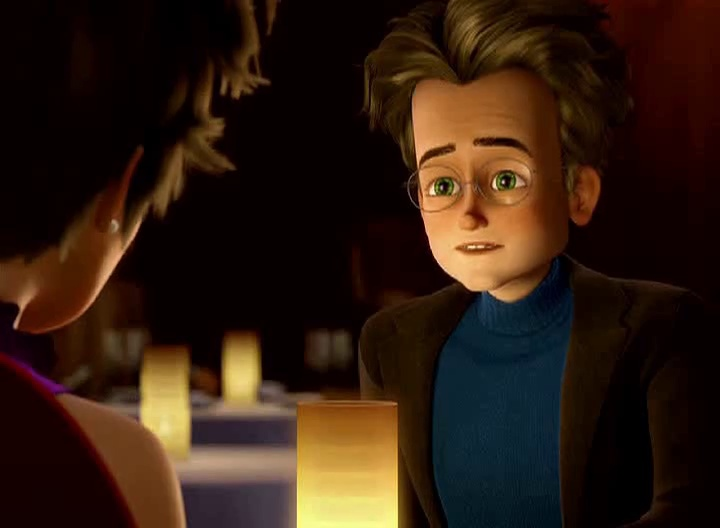

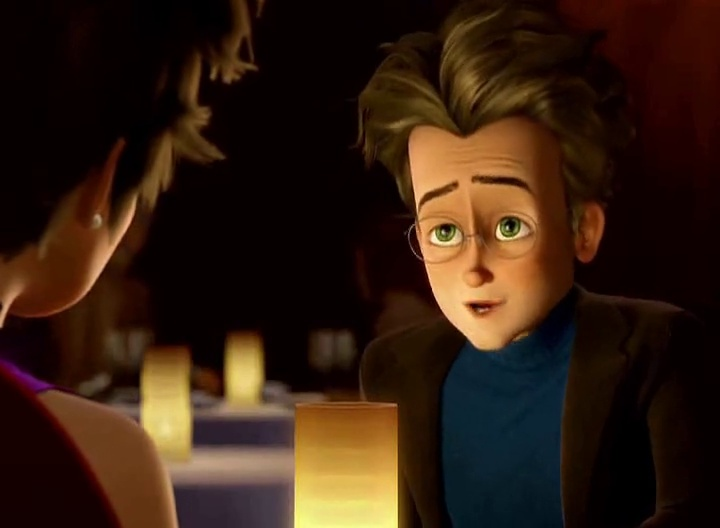

Number of images: 8


In [35]:
#Findframes with many returned videos
qry = [ {
    "FindFrames": {
        "frames": [100, 130],
        "format": "jpg"
    }
}
]

response, blob = db.query(qry)

print(response)
print("First Frame Size:", len(blob[0])/1024, "KB")

util.display_images(blob)    
print ("Number of images:", len(blob))

In [ ]:
#Consecutive findframes
qry = [ 
    {
        "FindFrames": {
            "frames": [100, 130, 160],
            "constraints": {
                "name": ["==", "megamind_clip"]
            }, 
            "format": "jpg"
        }
    },
    {
        "FindFrames": 
        {
            "frames": [100, 130, 160],
            "constraints": {
                "name": ["==", "f65sec"]
            }, 
            "format": "jpg"
        }
    }
]

response, blob = db.query(qry)

print(response)
print("First Frame Size:", len(blob[0])/1024, "KB")

util.display_images(blob)    
print ("Number of images:", len(blob))